In [74]:
#import packages
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score

In [75]:
#load dataset
df = pd.read_csv('wisc_bc_data.csv')

# Question 1

In [76]:
#check if missing value
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [77]:
#check if the target variables balanced
df.groupby('diagnosis').count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


# Question 2

In [30]:
#binarize the outcome
df['binary_outcome'] = df['diagnosis'].map(lambda x : 1 if x == 'M' else 0) 

In [31]:
#drop diagnosis column
_ = df.pop('diagnosis')

In [32]:
#create labels and features
y = df.pop('binary_outcome')
X = df

In [33]:
#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [34]:
#define scaling
scale = StandardScaler() 

In [64]:
#define ML method, k=sqrt(n)
clf = KNeighborsClassifier(n_neighbors=20) 

In [65]:
pipe = Pipeline([('scale', scale), ('clf', clf)])

In [66]:
pipe = pipe.fit(X_train, y_train)

In [67]:
y_pred_train= pipe.predict(X_train)
print('train score accuracy',100*(y_pred_train == y_train).mean())

y_pred_test= pipe.predict(X_test)
print('test score accuracy',100*(y_pred_test == y_test).mean())
print(' ')
precision = metrics.precision_score(y_test,y_pred_test)
recall = metrics.recall_score(y_test,y_pred_test)
f1 = metrics.f1_score(y_test,y_pred_test)
print('precision',precision)
print('recall',recall)
print('f1',f1)

train score accuracy 94.94505494505493
test score accuracy 99.12280701754386
 
precision 1.0
recall 0.9743589743589743
f1 0.9870129870129869


In [68]:
y_pred_test_prob= pipe.predict_proba(X_test)

In [69]:
y_pred_test_prob =list(map(lambda x :x[1], y_pred_test_prob))

AUC 0.9948717948717949
precision 1.0
recall 0.9743589743589743
f1 0.9870129870129869


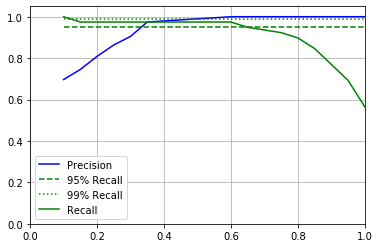

In [70]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_test_prob)

plt.plot(threshold, precision[:-1], "b-", label="Precision")
plt.plot(threshold, .95*np.ones(len(threshold)), "g--", label="95% Recall")
plt.plot(threshold, .99*np.ones(len(threshold)), "g:", label="99% Recall")
plt.plot(threshold, recall[:-1], "g-", label="Recall")
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test_prob, pos_label=1)
auc = metrics.auc(fpr, tpr)
precision = metrics.precision_score(y_test,y_pred_test)
recall = metrics.recall_score(y_test,y_pred_test)



f1 = metrics.f1_score(y_test,y_pred_test)
print('AUC',auc)
print('precision',precision)
print('recall',recall)
print('f1',f1)
plt.grid()
plt.xlim([0,1])
plt.ylim([0,1.05])

plt.legend()

# Question 3

In [78]:
#split data into training and test set
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=40)

In [79]:
clf_1 = KNeighborsClassifier(n_neighbors=20) 

In [80]:
pipe_1 = Pipeline([('clf', clf_1)])

In [81]:
pipe_1 = pipe.fit(X_train_1, y_train_1)

In [82]:
y_pred_train_1= pipe.predict(X_train_1)
print('train score accuracy',100*(y_pred_train_1 == y_train_1).mean())

y_pred_test_1= pipe.predict(X_test_1)
print('test score accuracy',100*(y_pred_test_1 == y_test_1).mean())
print(' ')
precision_1 = metrics.precision_score(y_test_1,y_pred_test_1)
recall_1 = metrics.recall_score(y_test_1,y_pred_test_1)
f1_1 = metrics.f1_score(y_test_1,y_pred_test_1)
print('precision_1',precision)
print('recall_1',recall)
print('f1_1',f1)

train score accuracy 94.94505494505493
test score accuracy 99.12280701754386
 
precision_1 1.0
recall_1 0.9743589743589743
f1_1 0.9870129870129869
